In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from pprint import pprint
import json
import csv

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
with open("./f.json", "r") as f:
    data = json.load(f)
data

{'errors': [],
 'generated_at': '2025-02-27T17:56:05Z',
 'metrics': {'./benchmarks.py': {'CONFIDENCE.HIGH': 9,
   'CONFIDENCE.LOW': 0,
   'CONFIDENCE.MEDIUM': 0,
   'CONFIDENCE.UNDEFINED': 0,
   'SEVERITY.HIGH': 0,
   'SEVERITY.LOW': 8,
   'SEVERITY.MEDIUM': 1,
   'SEVERITY.UNDEFINED': 0,
   'loc': 247,
   'nosec': 0,
   'skipped_tests': 0},
  './classify/predict.py': {'CONFIDENCE.HIGH': 0,
   'CONFIDENCE.LOW': 0,
   'CONFIDENCE.MEDIUM': 0,
   'CONFIDENCE.UNDEFINED': 0,
   'SEVERITY.HIGH': 0,
   'SEVERITY.LOW': 0,
   'SEVERITY.MEDIUM': 0,
   'SEVERITY.UNDEFINED': 0,
   'loc': 197,
   'nosec': 0,
   'skipped_tests': 0},
  './classify/train.py': {'CONFIDENCE.HIGH': 6,
   'CONFIDENCE.LOW': 0,
   'CONFIDENCE.MEDIUM': 0,
   'CONFIDENCE.UNDEFINED': 0,
   'SEVERITY.HIGH': 1,
   'SEVERITY.LOW': 5,
   'SEVERITY.MEDIUM': 0,
   'SEVERITY.UNDEFINED': 0,
   'loc': 299,
   'nosec': 0,
   'skipped_tests': 0},
  './classify/val.py': {'CONFIDENCE.HIGH': 0,
   'CONFIDENCE.LOW': 0,
   'CONFIDENCE.MEDIUM'

In [3]:
data["results"]

[{'code': '103         try:\n104             assert i not in (9, 10), "inference not supported"  # Edge TPU and TF.js are unsupported\n105             assert i != 5 or platform.system() == "Darwin", "inference only supported on macOS>=10.13"  # CoreML\n',
  'col_offset': 12,
  'end_col_offset': 62,
  'filename': './benchmarks.py',
  'issue_confidence': 'HIGH',
  'issue_cwe': {'id': 703,
   'link': 'https://cwe.mitre.org/data/definitions/703.html'},
  'issue_severity': 'LOW',
  'issue_text': 'Use of assert detected. The enclosed code will be removed when compiling to optimised byte code.',
  'line_number': 104,
  'line_range': [104],
  'more_info': 'https://bandit.readthedocs.io/en/1.8.3/plugins/b101_assert_used.html',
  'test_id': 'B101',
  'test_name': 'assert_used'},
 {'code': '104             assert i not in (9, 10), "inference not supported"  # Edge TPU and TF.js are unsupported\n105             assert i != 5 or platform.system() == "Darwin", "inference only supported on macOS>=10.

In [4]:
sev_high, sev_med, sev_low = 0, 0, 0
conf_high, conf_med, conf_low = 0, 0, 0
cwe = set()

for item in data["results"]:
    # Severity Count
    if item["issue_severity"] == "HIGH":
        sev_high += 1
    elif item["issue_severity"] == "MEDIUM":
        sev_med += 1
    elif item["issue_severity"] == "LOW":
        sev_low += 1

    # Confidence Count
    if item["issue_confidence"] == "HIGH":
        conf_high += 1
    elif item["issue_confidence"] == "MEDIUM":
        conf_med += 1
    elif item["issue_confidence"] == "LOW":
        conf_low += 1

    # CWE Extraction (Handles missing values)
    if "issue_cwe" in item and isinstance(item["issue_cwe"], dict) and "id" in item["issue_cwe"]:
        cwe.add(str(item["issue_cwe"]["id"]))  # Ensure CWE is a string

In [5]:
columns = [
    "sev_high",
    "sev_med",
    "sev_low",
    "conf_high",
    "conf_med",
    "conf_low",
    "cwe"
]

In [6]:
data_ = [
    sev_high,
    sev_med,
    sev_low,
    conf_high,
    conf_med,
    conf_low,
    ",".join(cwe)
]
data_

[12, 31, 213, 249, 3, 4, '400,330,78,605,703,22,502,377,20']

In [7]:
csv_file = "results.csv"
with open(csv_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    writer.writerows([data_])

print(f"CSV file created at {csv_file}")

CSV file created at results.csv


In [2]:
datasets = pd.read_csv("./results/datasets/results.csv")
fastapi = pd.read_csv("./results/fastapi/results.csv")
yolov5 = pd.read_csv("./results/yolov5/results.csv")

In [3]:
datasets

,commit,sev_high,sev_med,sev_low,conf_high,conf_med,conf_low,cwe
0,14233c0176f6bc0576e6a4ce4bb63e34f16cbc18,3,26,2918,2941,4,2,"20,502,78,22,732,330,89,259,400,703"
1,b37230c09f29aea04799ed4a833f91ccf779a186,3,26,2918,2941,4,2,"20,502,78,22,732,330,89,259,400,703"
2,c33c8bc248253b265ade2c944a37600bf551554f,3,26,2918,2941,4,2,"20,502,78,22,732,330,89,259,400,703"
3,b2887eb25699d3b8bca2181e82257a36956ba4de,3,26,2918,2941,4,2,"20,502,78,22,732,330,89,259,400,703"
4,cd67cf3bea4749e4e57fda2575f3f644b8b56d34,3,26,2918,2941,4,2,"20,502,78,22,732,330,89,259,400,703"
...,...,...,...,...,...,...,...,...
95,cedffa52879ebc5e4df43f0bcf8660ee7229f0dc,3,26,2840,2863,4,2,"20,502,78,22,732,330,89,259,400,703"
96,28780197dd3e4c125defae29ac8ef5346c41350a,3,26,2840,2863,4,2,"20,502,78,22,732,330,89,259,400,703"
97,70bac27ef861b2b11f581a291a6b76adeee24f98,3,28,2853,2878,4,2,"20,502,78,22,732,330,89,259,400,703"
98,0a0fa48a68c3502edfa50273b881f909e4e6e70c,3,28,2853,2878,4,2,"20,502,78,22,732,330,89,259,400,703"


In [4]:
fastapi

,commit,sev_high,sev_med,sev_low,conf_high,conf_med,conf_low,cwe
0,d90030c1e242d1e954a097c253734122eec926e3,0,1,2921,2861,61,0,"703,259,78,330,605"
1,3639fb00be3acad3618f97c56859e221f7fba4a7,0,1,2921,2861,61,0,"703,259,78,330,605"
2,7eabff43de6717a366c79ec92b808da988c085a3,0,1,2921,2861,61,0,"703,259,78,330,605"
3,a27fb4764bc6aed6c4a46d4b600af568dbc1aa65,0,1,2922,2862,61,0,"703,259,78,330,605"
4,7710a3480003518f48dc86cf29e8f19b5a4e5e46,0,1,2922,2862,61,0,"703,259,78,330,605"
...,...,...,...,...,...,...,...,...
95,83ab6ac95797395b5664626b66d1c3f1f5b0e8dc,0,1,3078,3018,61,0,"703,259,78,330,605"
96,3d02a920ab7c4b2d26bab67b10e35fc90a923ce1,0,1,3078,3018,61,0,"703,259,78,330,605"
97,1b00f8ae7821353cc9657797c475e2c0d9acd423,0,1,3078,3018,61,0,"703,259,78,330,605"
98,d97647fd572169cf0434919464de5406057e32f4,0,1,3078,3018,61,0,"703,259,78,330,605"


In [5]:
yolov5

,commit,sev_high,sev_med,sev_low,conf_high,conf_med,conf_low,cwe
0,5cdad8922c83b0ed49a0173cd1a8b0739acbb336,12,31,213,249,3,4,"377,20,330,22,78,605,400,502,703"
1,de62f93c210aaaffd710f9afe3b43ab624f7a21b,12,31,213,249,3,4,"377,20,330,22,78,605,400,502,703"
2,c568972d597ee2fa14525a739d8acb284fc19c87,12,31,213,249,3,4,"377,20,330,22,78,605,400,502,703"
3,6420a1db87460d36fd2141a65659093df27c1996,12,31,213,249,3,4,"377,20,330,22,78,605,400,502,703"
4,86fd1ab270cb2f7e53ee7412cd4a0650bf4bcc51,12,31,213,249,3,4,"377,20,330,22,78,605,400,502,703"
...,...,...,...,...,...,...,...,...
95,cf8b67b7e9b49bed087ef27b4847edd84c687c34,12,31,214,250,3,4,"377,20,330,22,78,605,400,502,703"
96,51dc1af6e82fbcc0bb2eccddc2148bbc0268695c,12,31,214,250,3,4,"377,20,330,22,78,605,400,502,703"
97,6c8f6933521ee32600b506970af1402ce02b443a,12,31,214,250,3,4,"377,20,330,22,78,605,400,502,703"
98,a3ddc1795e159699418c9f63403f4ad6a92f75aa,12,31,214,250,3,4,"377,20,330,22,78,605,400,502,703"


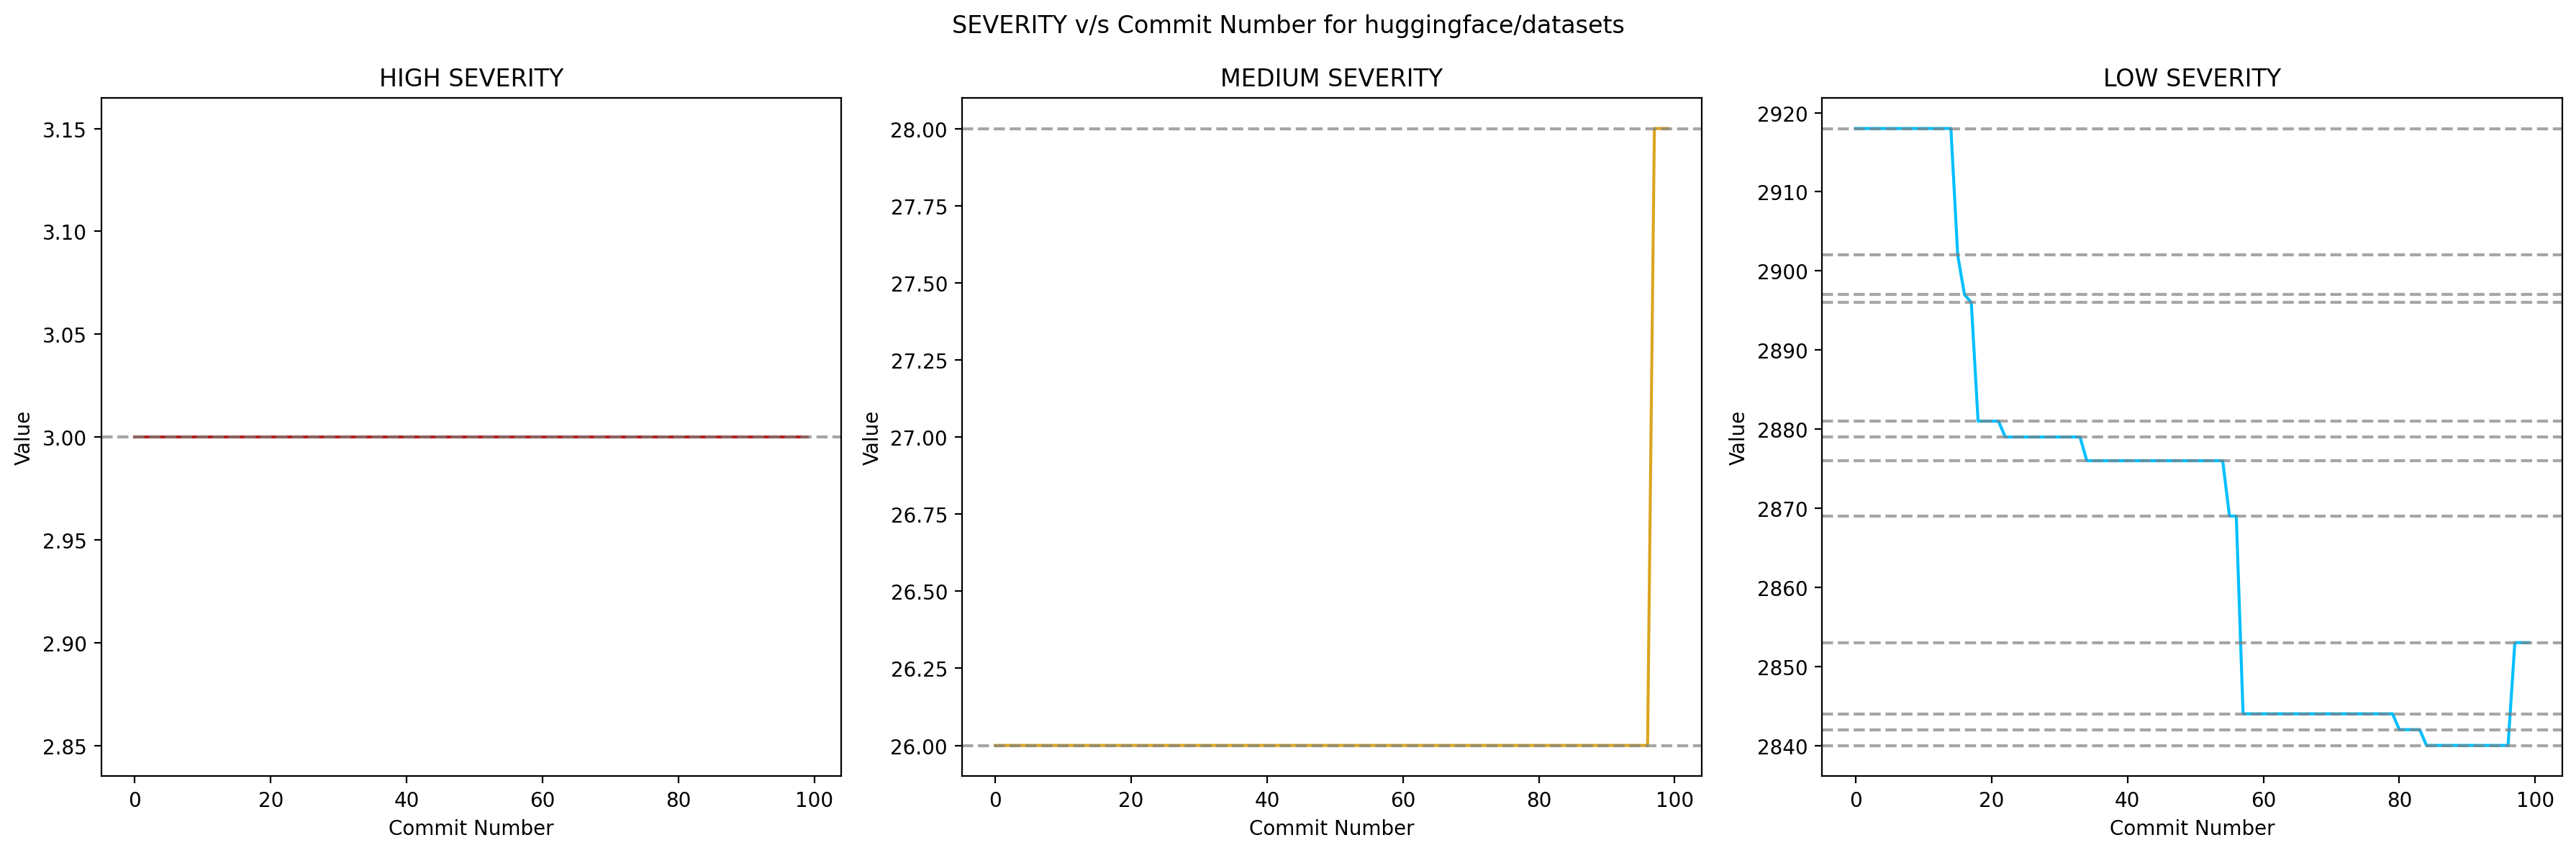

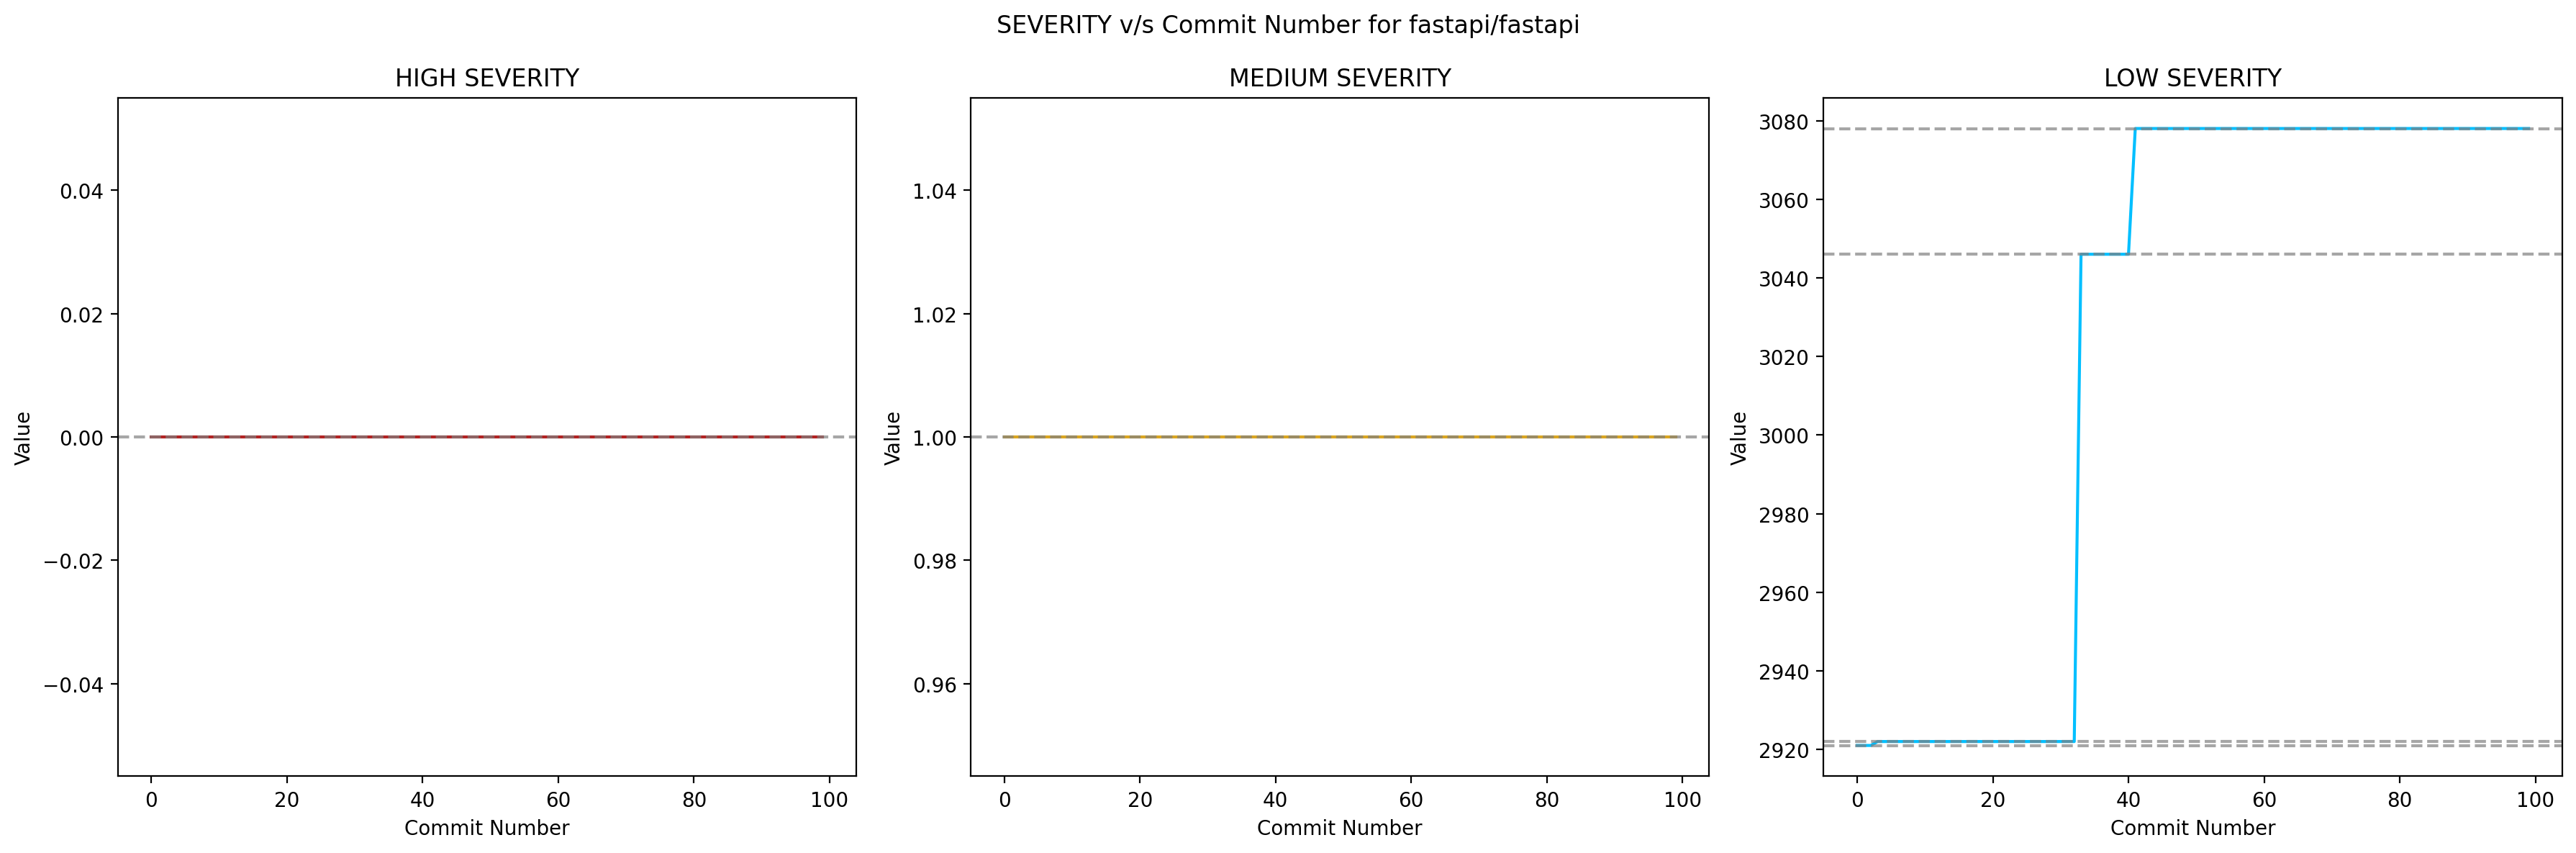

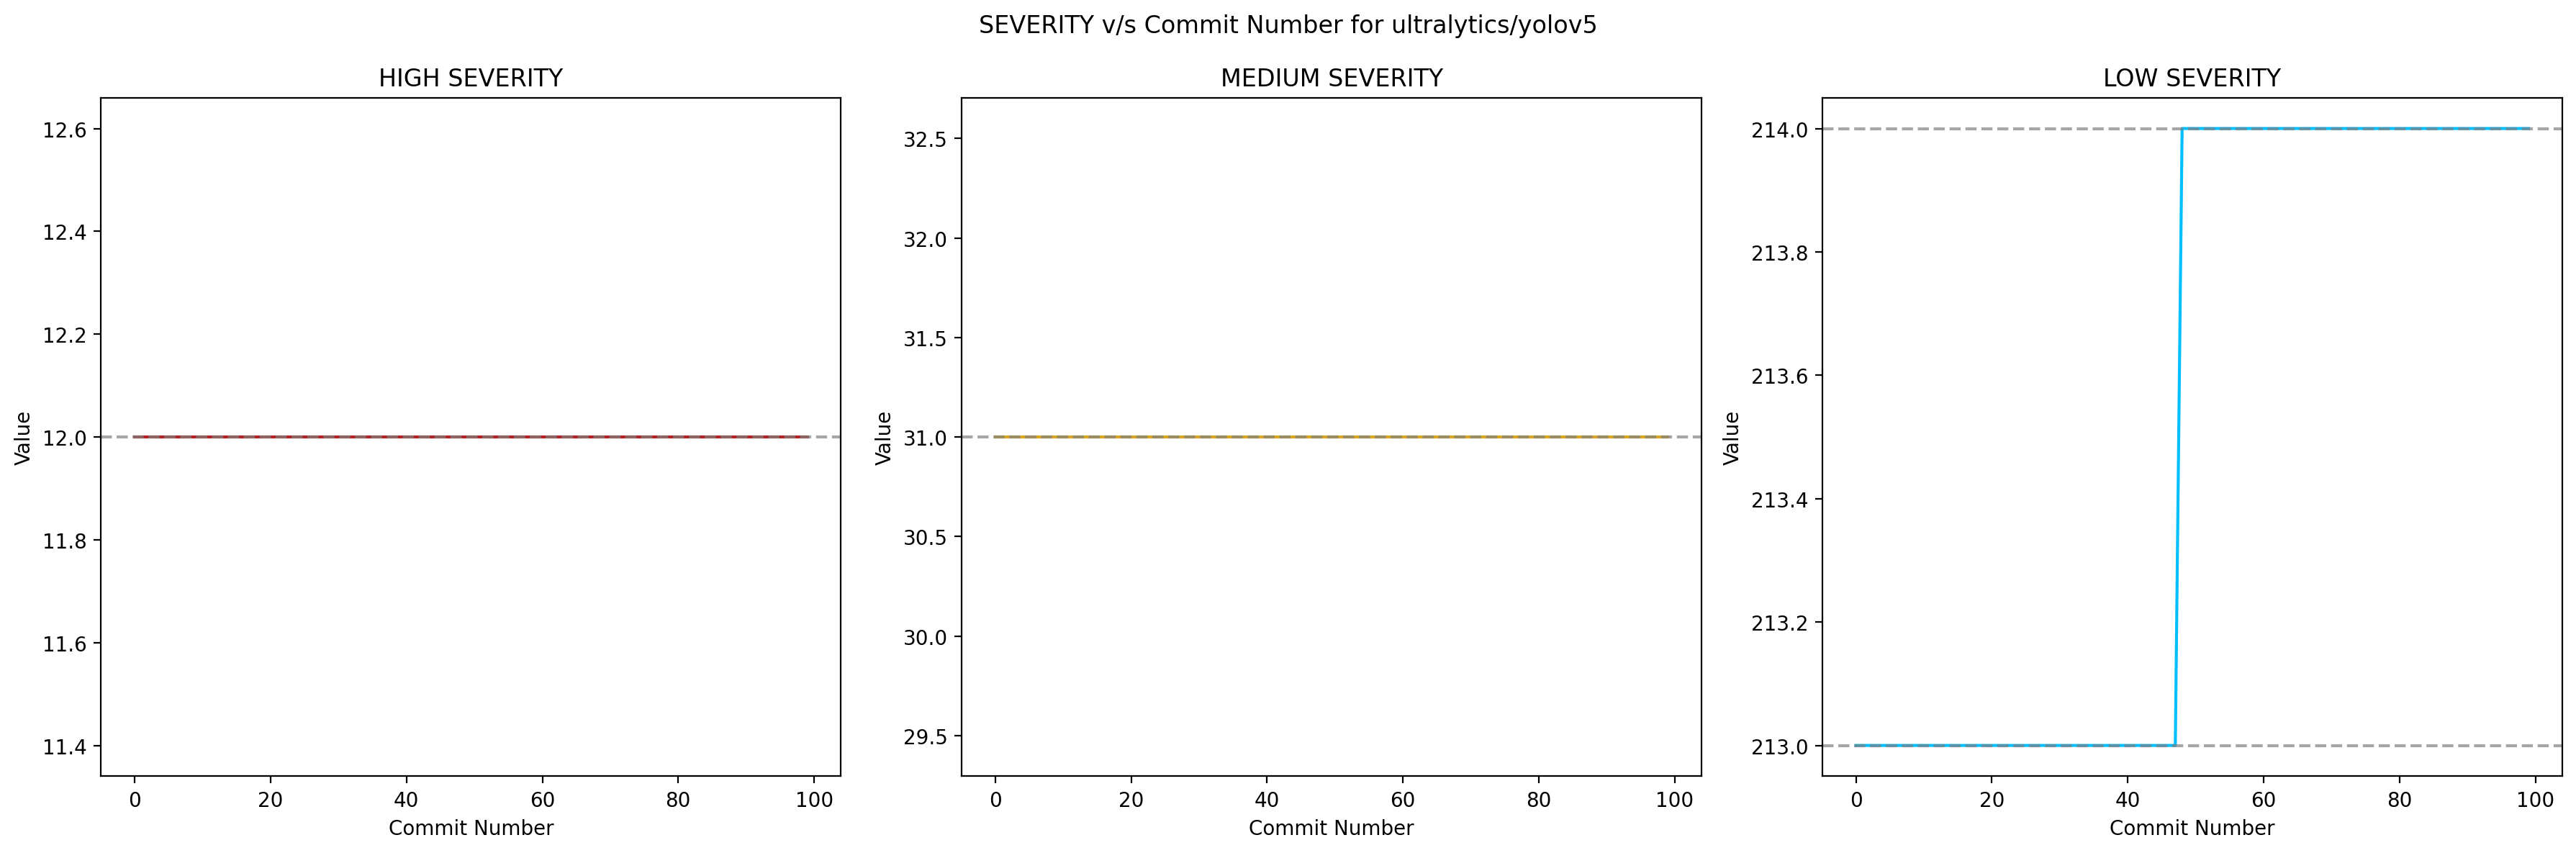

In [6]:
datas = [datasets, fastapi, yolov5]
titles = ["huggingface/datasets", "fastapi/fastapi", "ultralytics/yolov5"]

for data, title in zip(datas, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.lineplot(data=data, x=data.index, y="sev_high", ax=axes[0], color="firebrick")
    axes[0].set_title("HIGH SEVERITY")
    axes[0].set_xlabel("Commit Number")
    axes[0].set_ylabel("Value")
    for value in data["sev_high"].unique():
        axes[0].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    sns.lineplot(data=data, x=data.index, y="sev_med", ax=axes[1], color="goldenrod")
    axes[1].set_title("MEDIUM SEVERITY")
    axes[1].set_xlabel("Commit Number")
    axes[1].set_ylabel("Value")
    for value in data["sev_med"].unique():
        axes[1].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    sns.lineplot(data=data, x=data.index, y="sev_low", ax=axes[2], color="deepskyblue")
    axes[2].set_title("LOW SEVERITY")
    axes[2].set_xlabel("Commit Number")
    axes[2].set_ylabel("Value")
    for value in data["sev_low"].unique():
        axes[2].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    plt.suptitle(f"SEVERITY v/s Commit Number for {title}")
    plt.tight_layout()
    
    name = title.split("/")[1]
    plt.savefig(f"./media/{name}_severity.png", dpi=1200)
    plt.show()

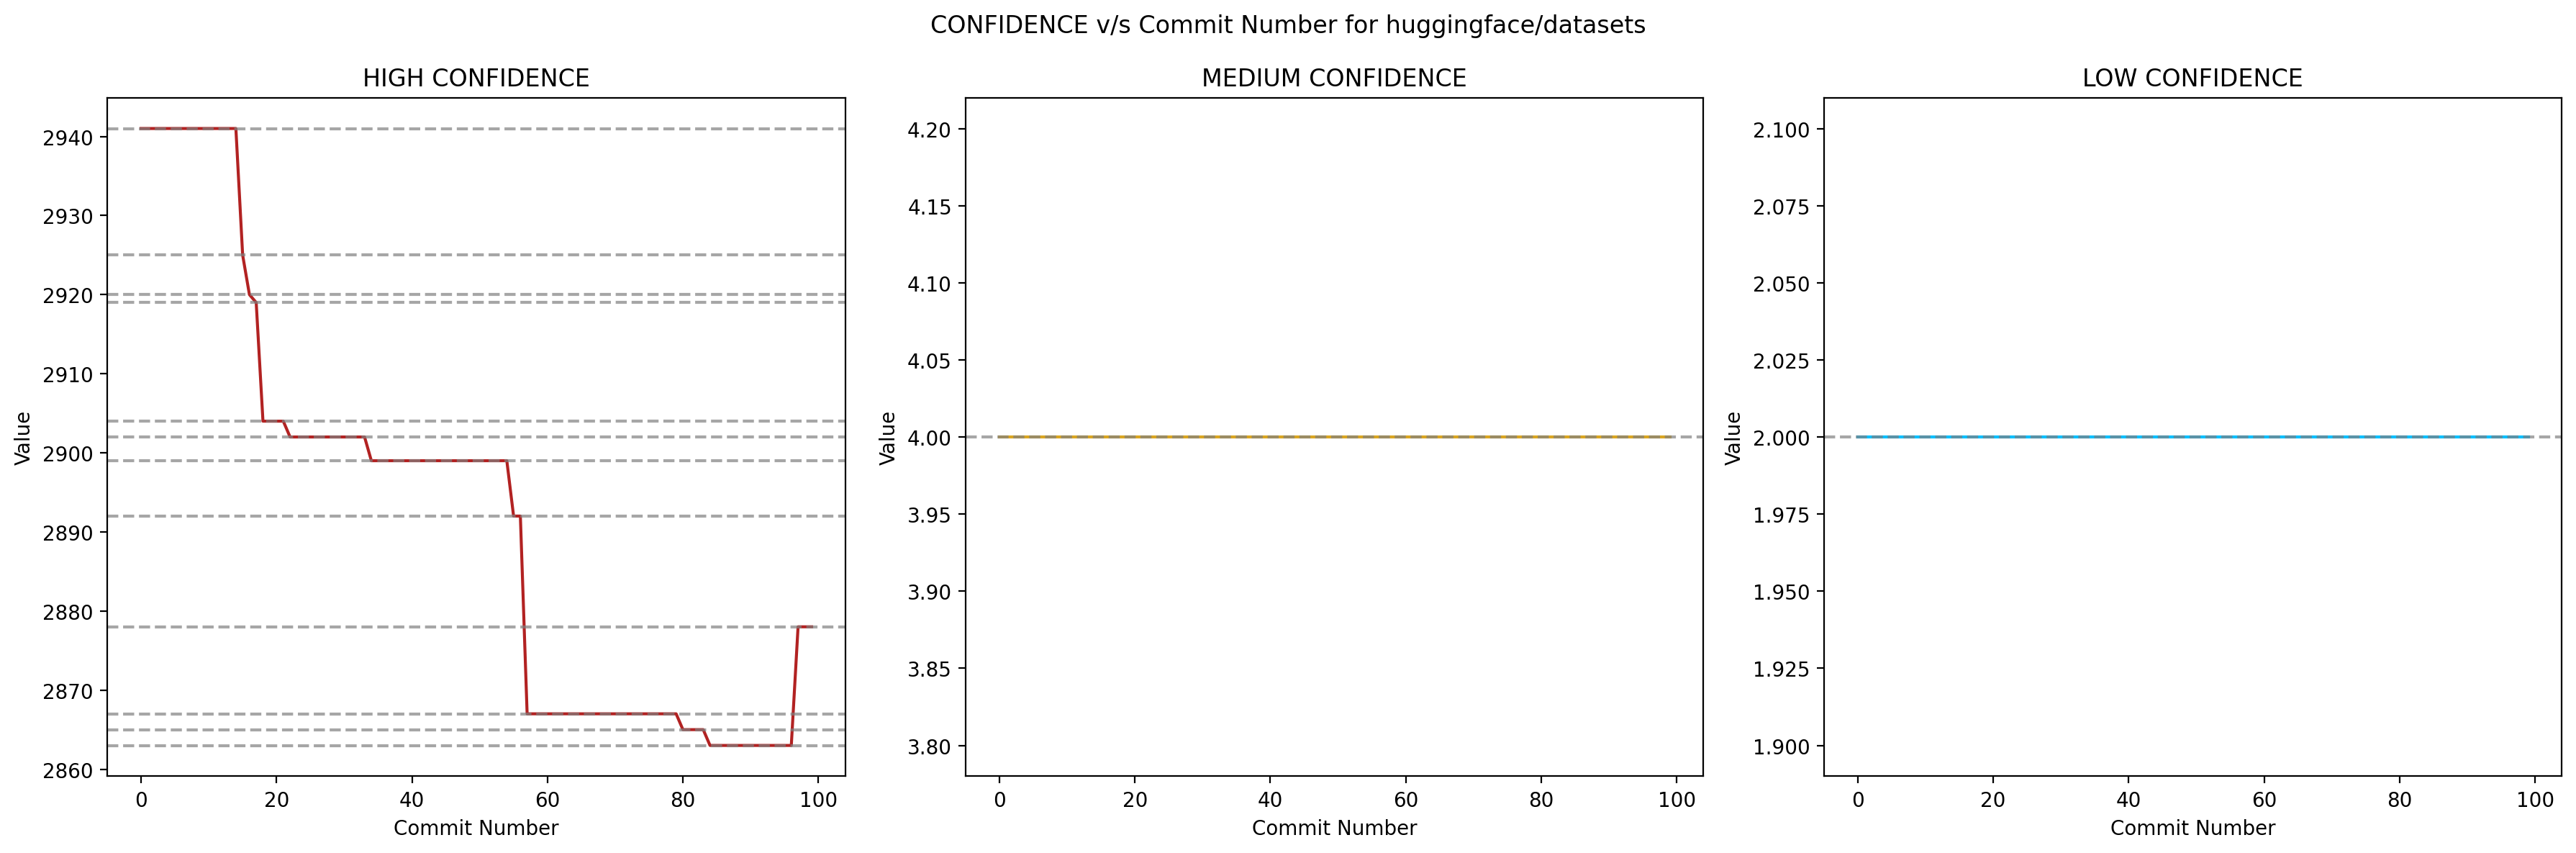

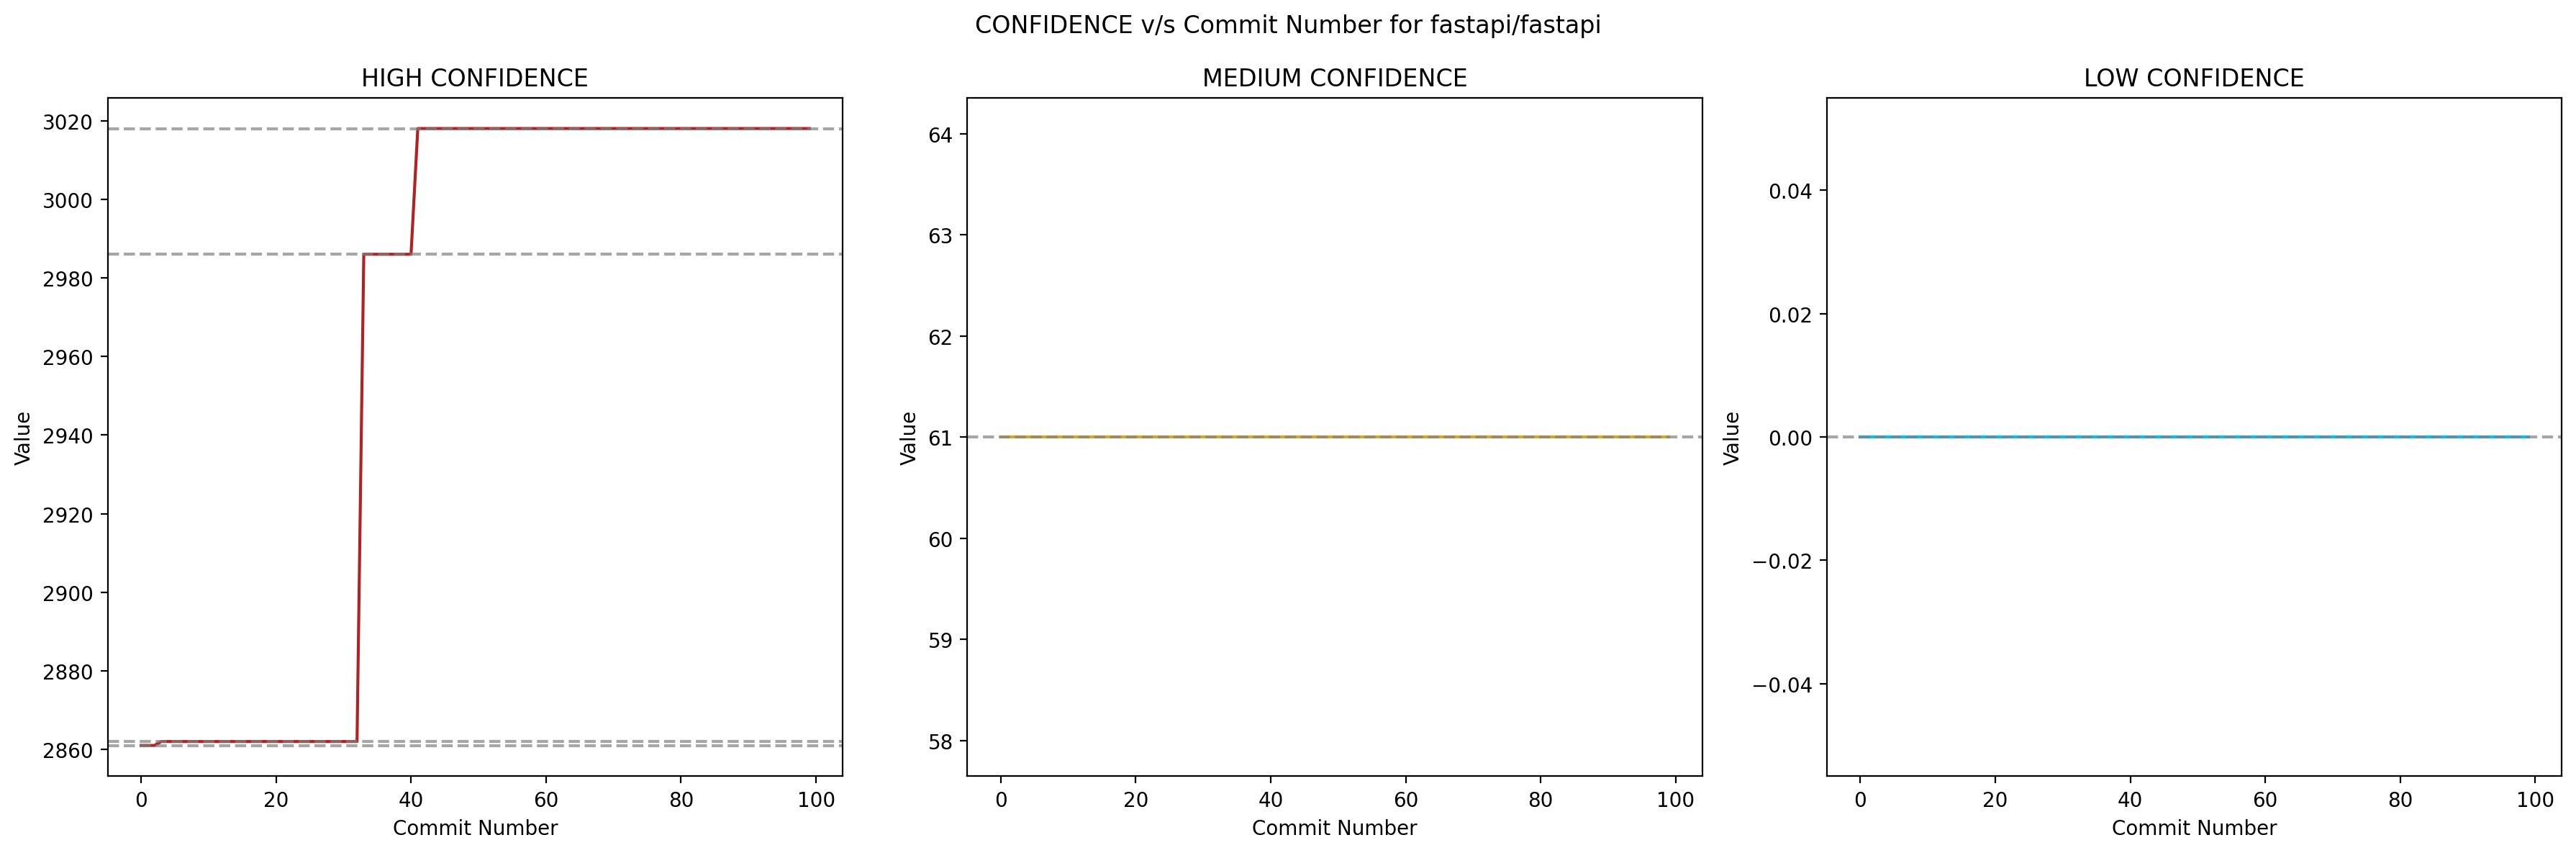

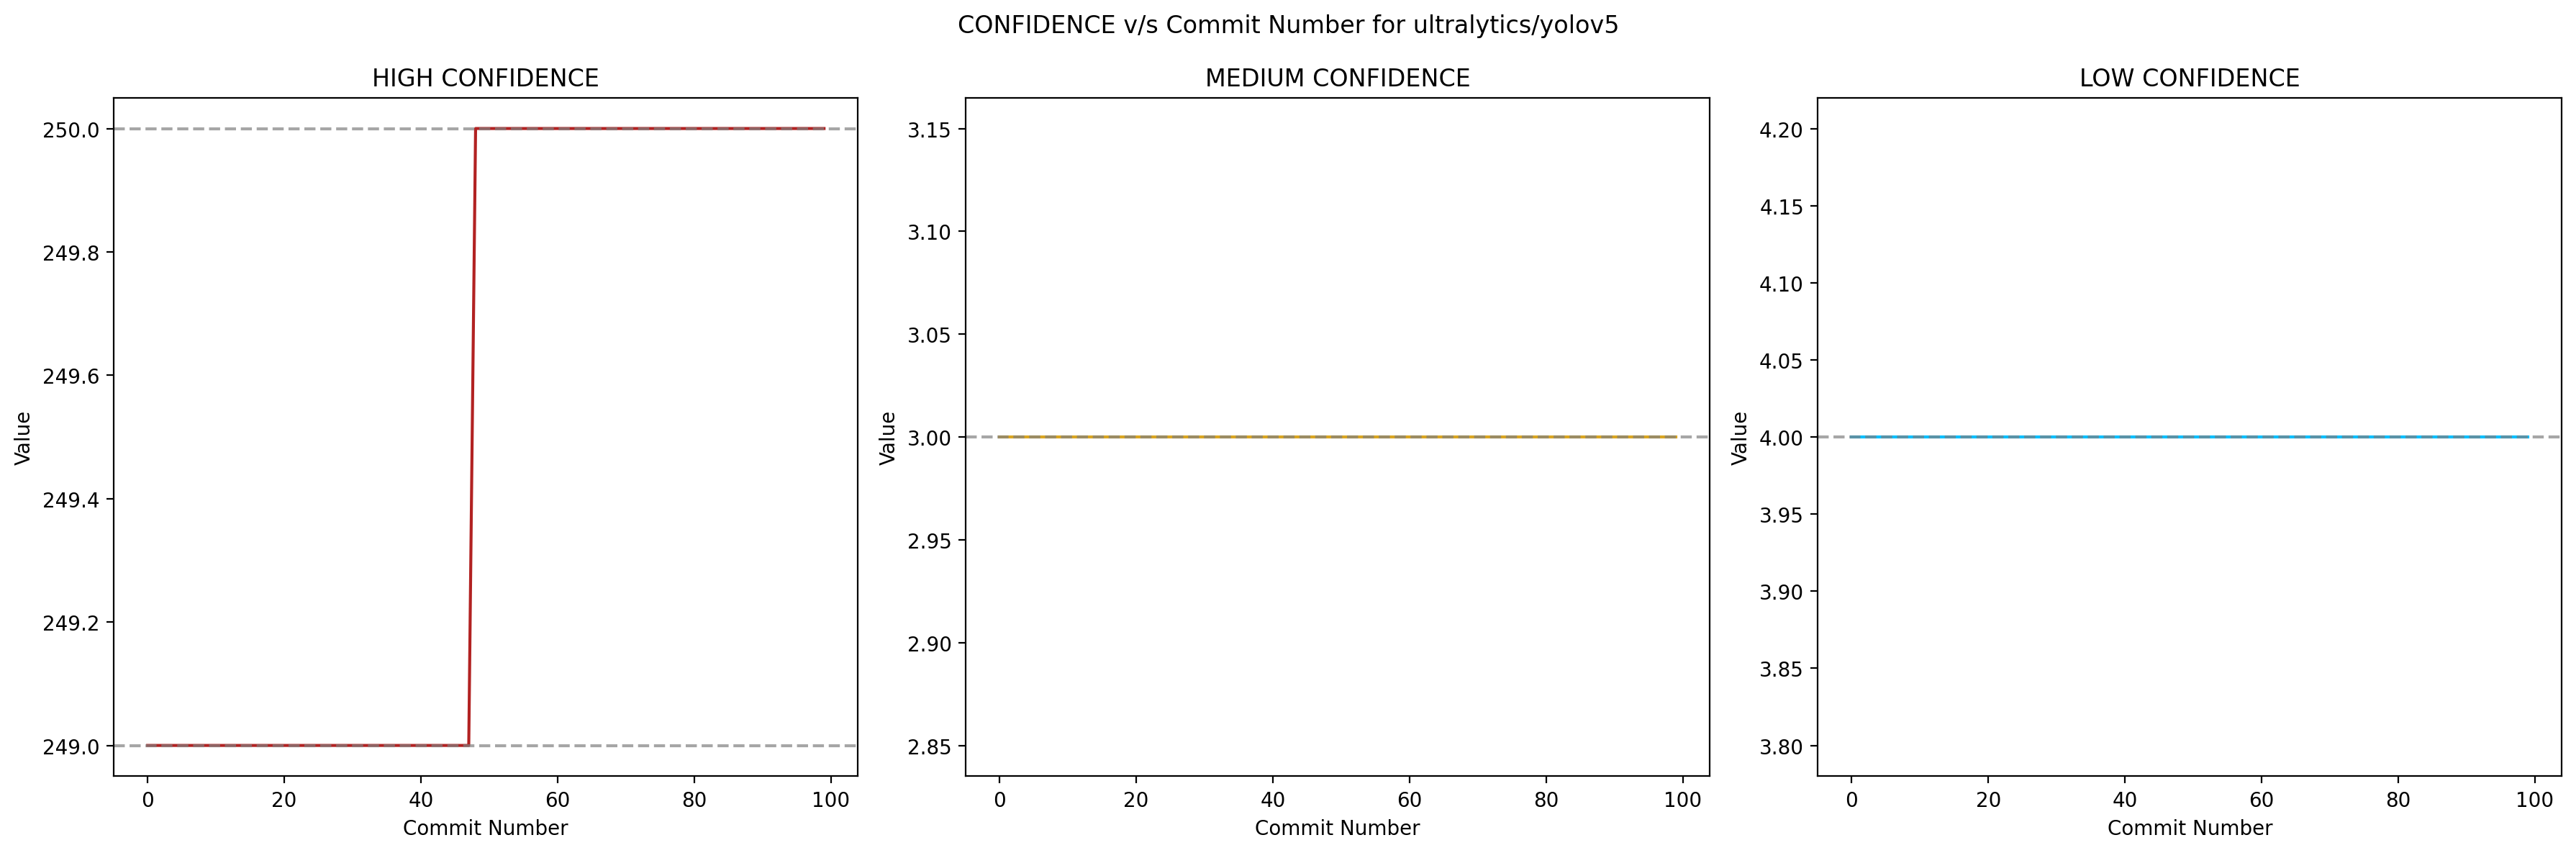

In [7]:
for data, title in zip(datas, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.lineplot(data=data, x=data.index, y="conf_high", ax=axes[0], color="firebrick")
    axes[0].set_title("HIGH CONFIDENCE")
    axes[0].set_xlabel("Commit Number")
    axes[0].set_ylabel("Value")
    for value in data["conf_high"].unique():
        axes[0].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    sns.lineplot(data=data, x=data.index, y="conf_med", ax=axes[1], color="goldenrod")
    axes[1].set_title("MEDIUM CONFIDENCE")
    axes[1].set_xlabel("Commit Number")
    axes[1].set_ylabel("Value")
    for value in data["conf_med"].unique():
        axes[1].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    sns.lineplot(data=data, x=data.index, y="conf_low", ax=axes[2], color="deepskyblue")
    axes[2].set_title("LOW CONFIDENCE")
    axes[2].set_xlabel("Commit Number")
    axes[2].set_ylabel("Value")
    for value in data["conf_low"].unique():
        axes[2].axhline(y=value, linestyle='--', color='grey', alpha=0.7)

    name = title.split("/")[1]
    plt.suptitle(f"CONFIDENCE v/s Commit Number for {title}")
    plt.tight_layout()
    plt.savefig(f"./media/{name}_confidence.png", dpi=1200)
    plt.show()

In [9]:
cwe_count = defaultdict(int)
for data in datas:
    for item in data["cwe"]:
        for cwe_id in item.split(","):
            cwe_count[cwe_id] += 1

pprint(cwe_count)

cwe_counts_individual = []
for data in datas:
    repo_cwe_count = defaultdict(int)
    for item in data["cwe"]:
        for cwe_id in item.split(","):
            repo_cwe_count[cwe_id] += 1
    cwe_counts_individual.append(repo_cwe_count)

for title, repo_cwe_count in zip(titles, cwe_counts_individual):
    print(f"\nCWE Count for {title}:")
    pprint(repo_cwe_count)

defaultdict(<class 'int'>,
            {'20': 200,
             '22': 200,
             '259': 200,
             '330': 300,
             '377': 100,
             '400': 200,
             '502': 200,
             '605': 200,
             '703': 300,
             '732': 100,
             '78': 300,
             '89': 100})

CWE Count for huggingface/datasets:
defaultdict(<class 'int'>,
            {'20': 100,
             '22': 100,
             '259': 100,
             '330': 100,
             '400': 100,
             '502': 100,
             '703': 100,
             '732': 100,
             '78': 100,
             '89': 100})

CWE Count for fastapi/fastapi:
defaultdict(<class 'int'>,
            {'259': 100,
             '330': 100,
             '605': 100,
             '703': 100,
             '78': 100})

CWE Count for ultralytics/yolov5:
defaultdict(<class 'int'>,
            {'20': 100,
             '22': 100,
             '330': 100,
             '377': 100,
             '400': 1

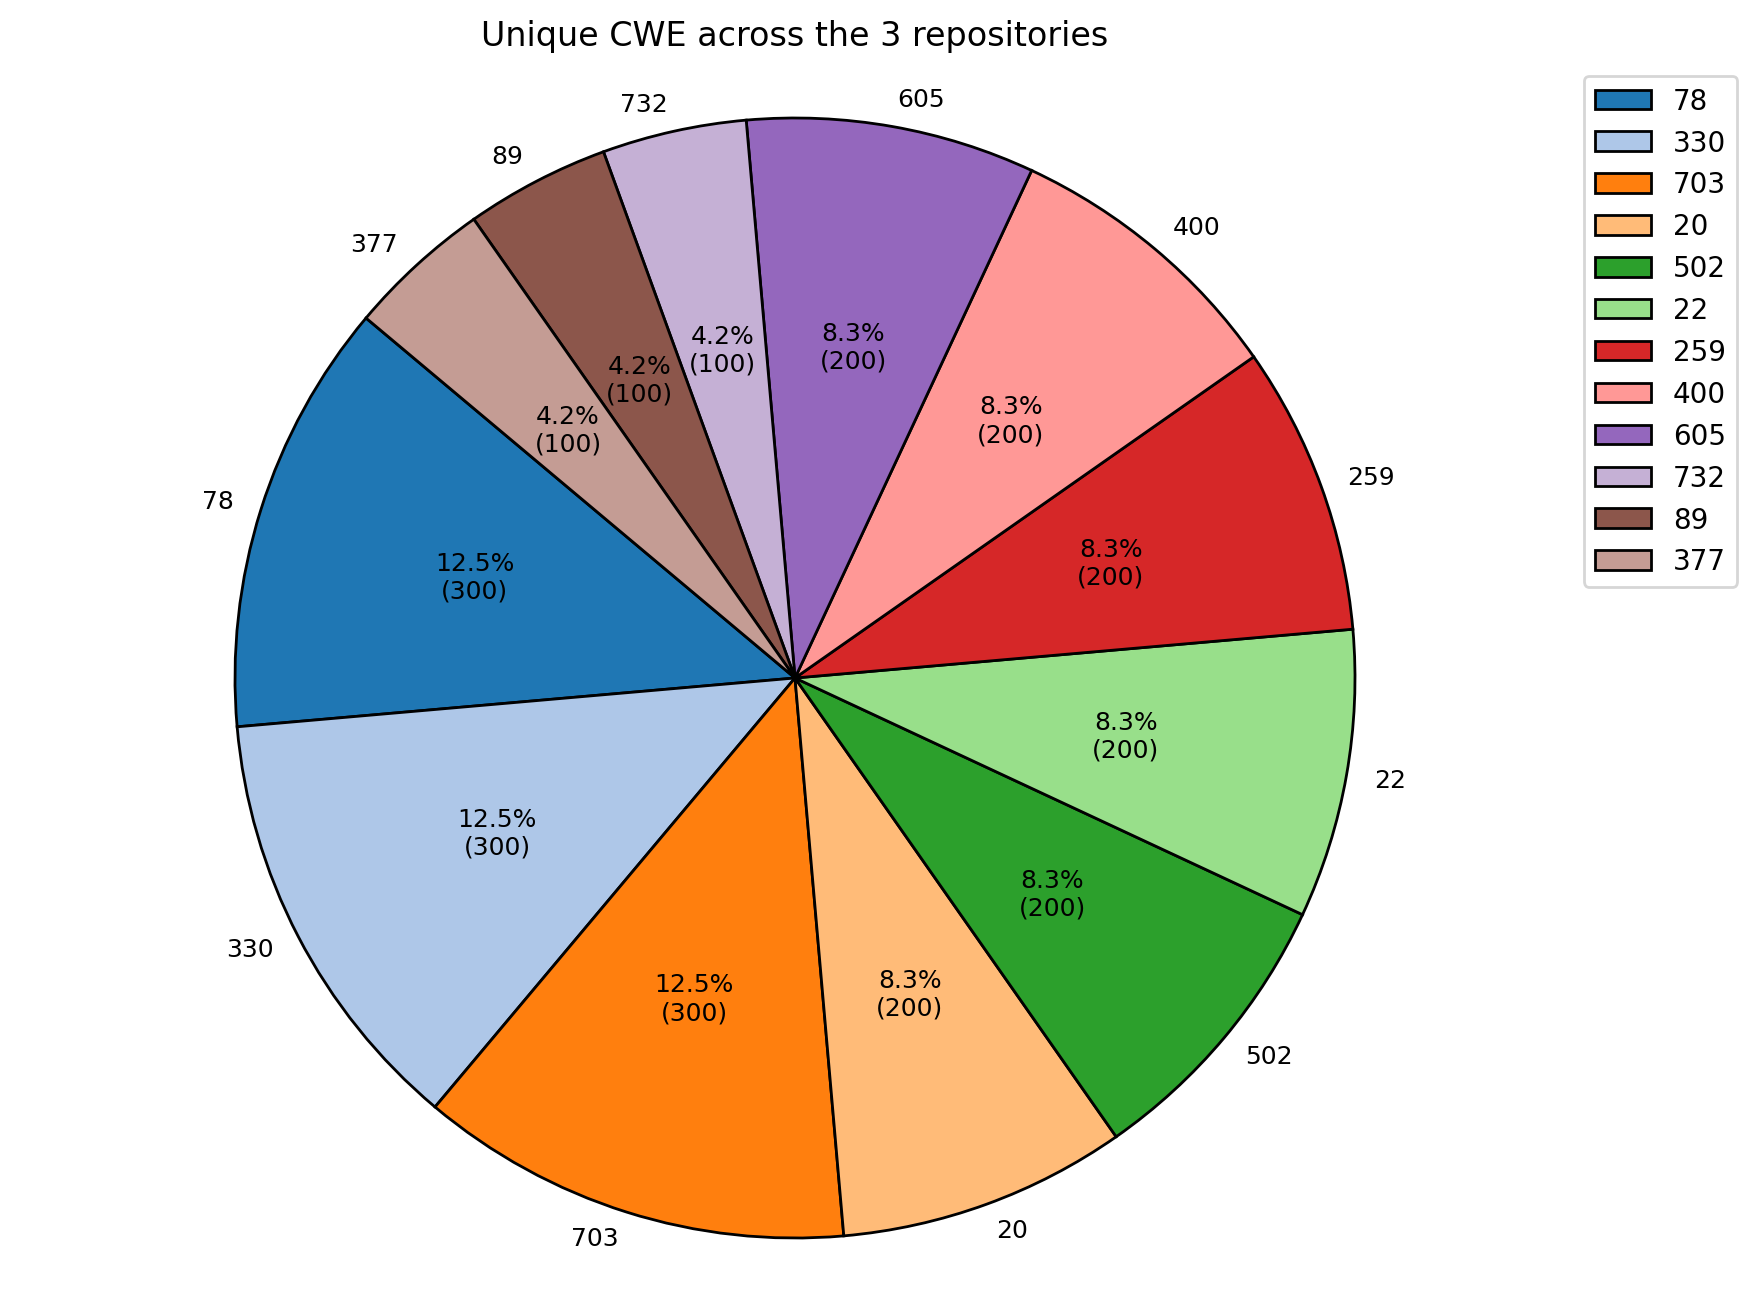

In [10]:
plt.subplots(figsize=(10, 8))
cwe_count = dict(sorted(cwe_count.items(), key=lambda x: x[1], reverse=True))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

plt.pie(cwe_count.values(), labels=cwe_count.keys(), autopct=autopct_format(cwe_count.values()), startangle=140, colors=sns.color_palette('tab20', len(cwe_count)), wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 9}, labeldistance=1.05)
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Unique CWE across the 3 repositories")
plt.savefig("./media/cwe_pie.png", dpi=1200)
plt.show()

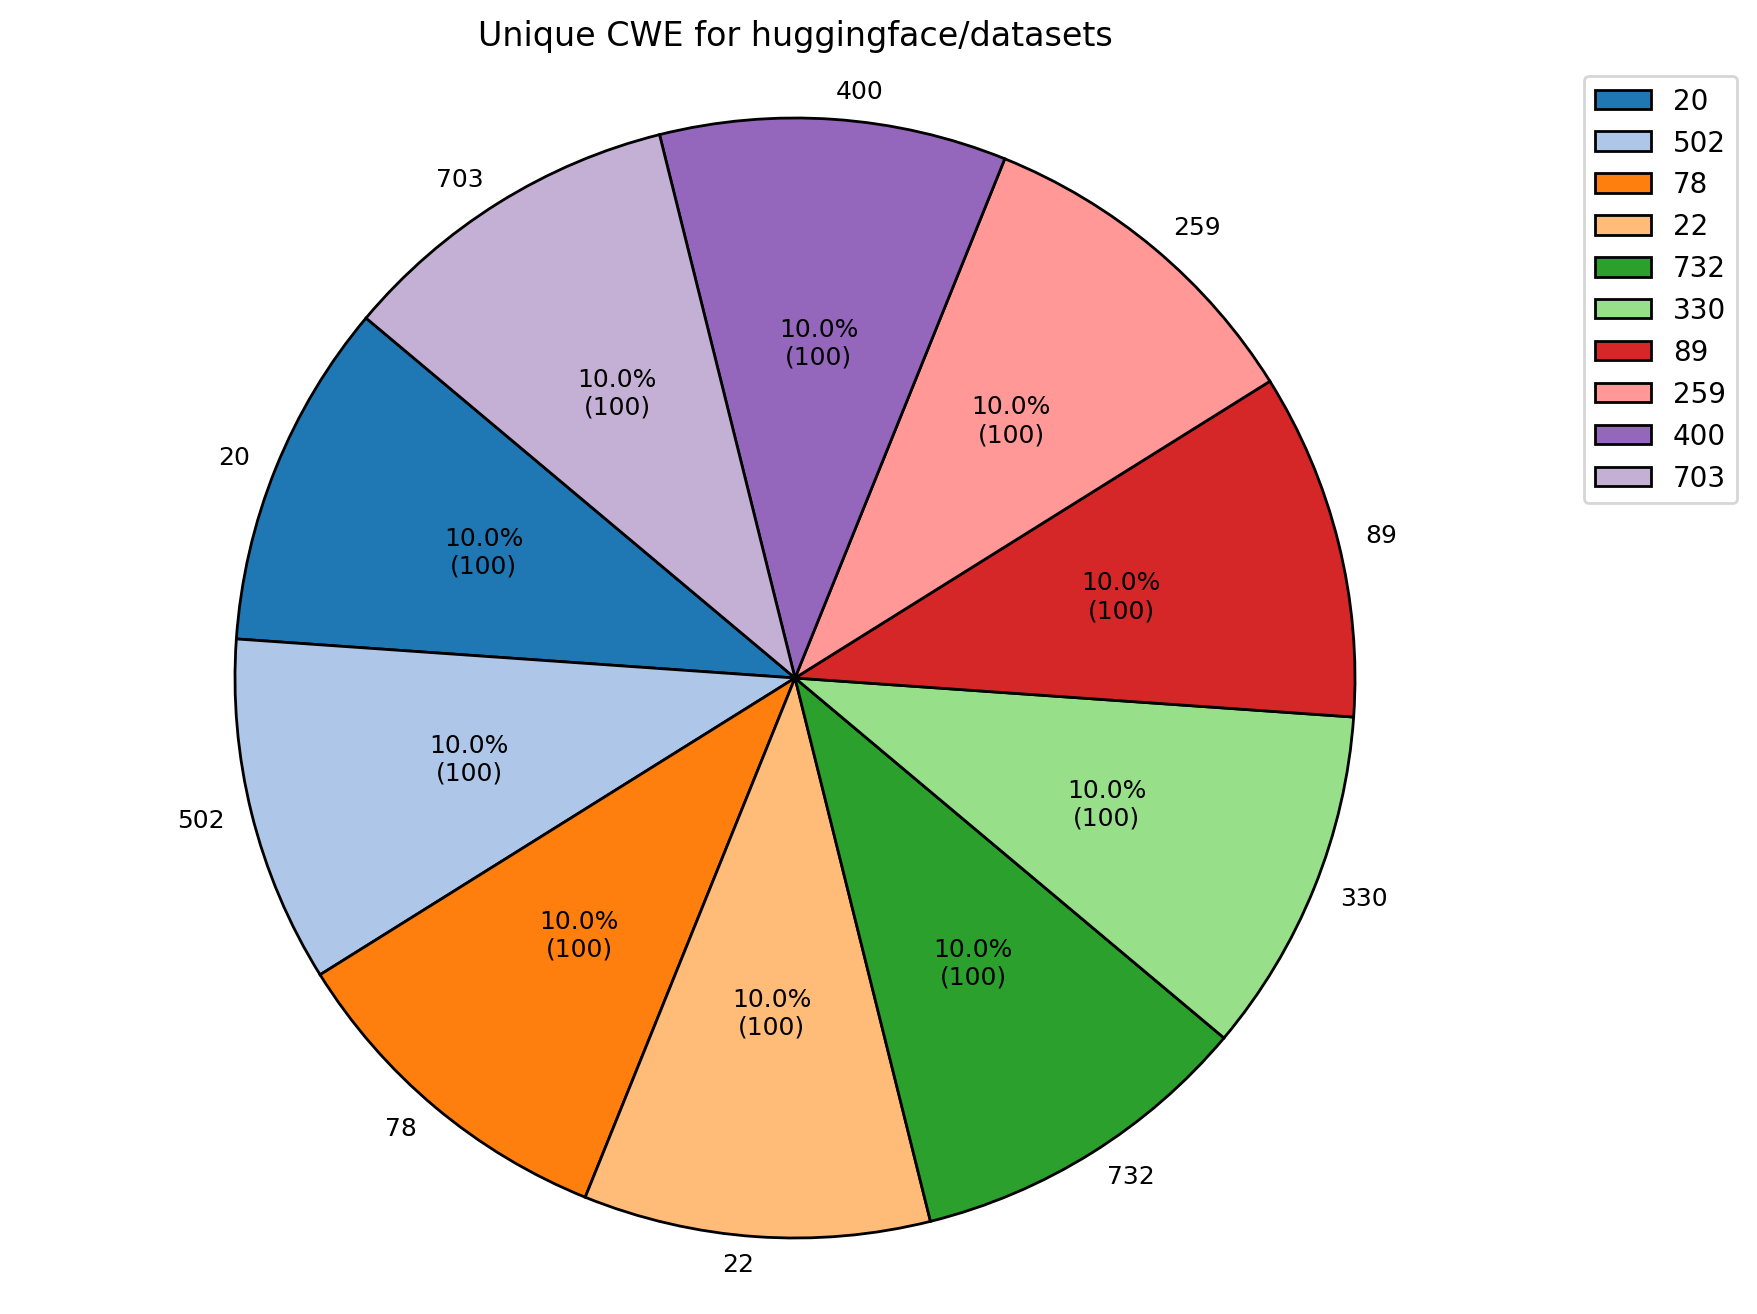

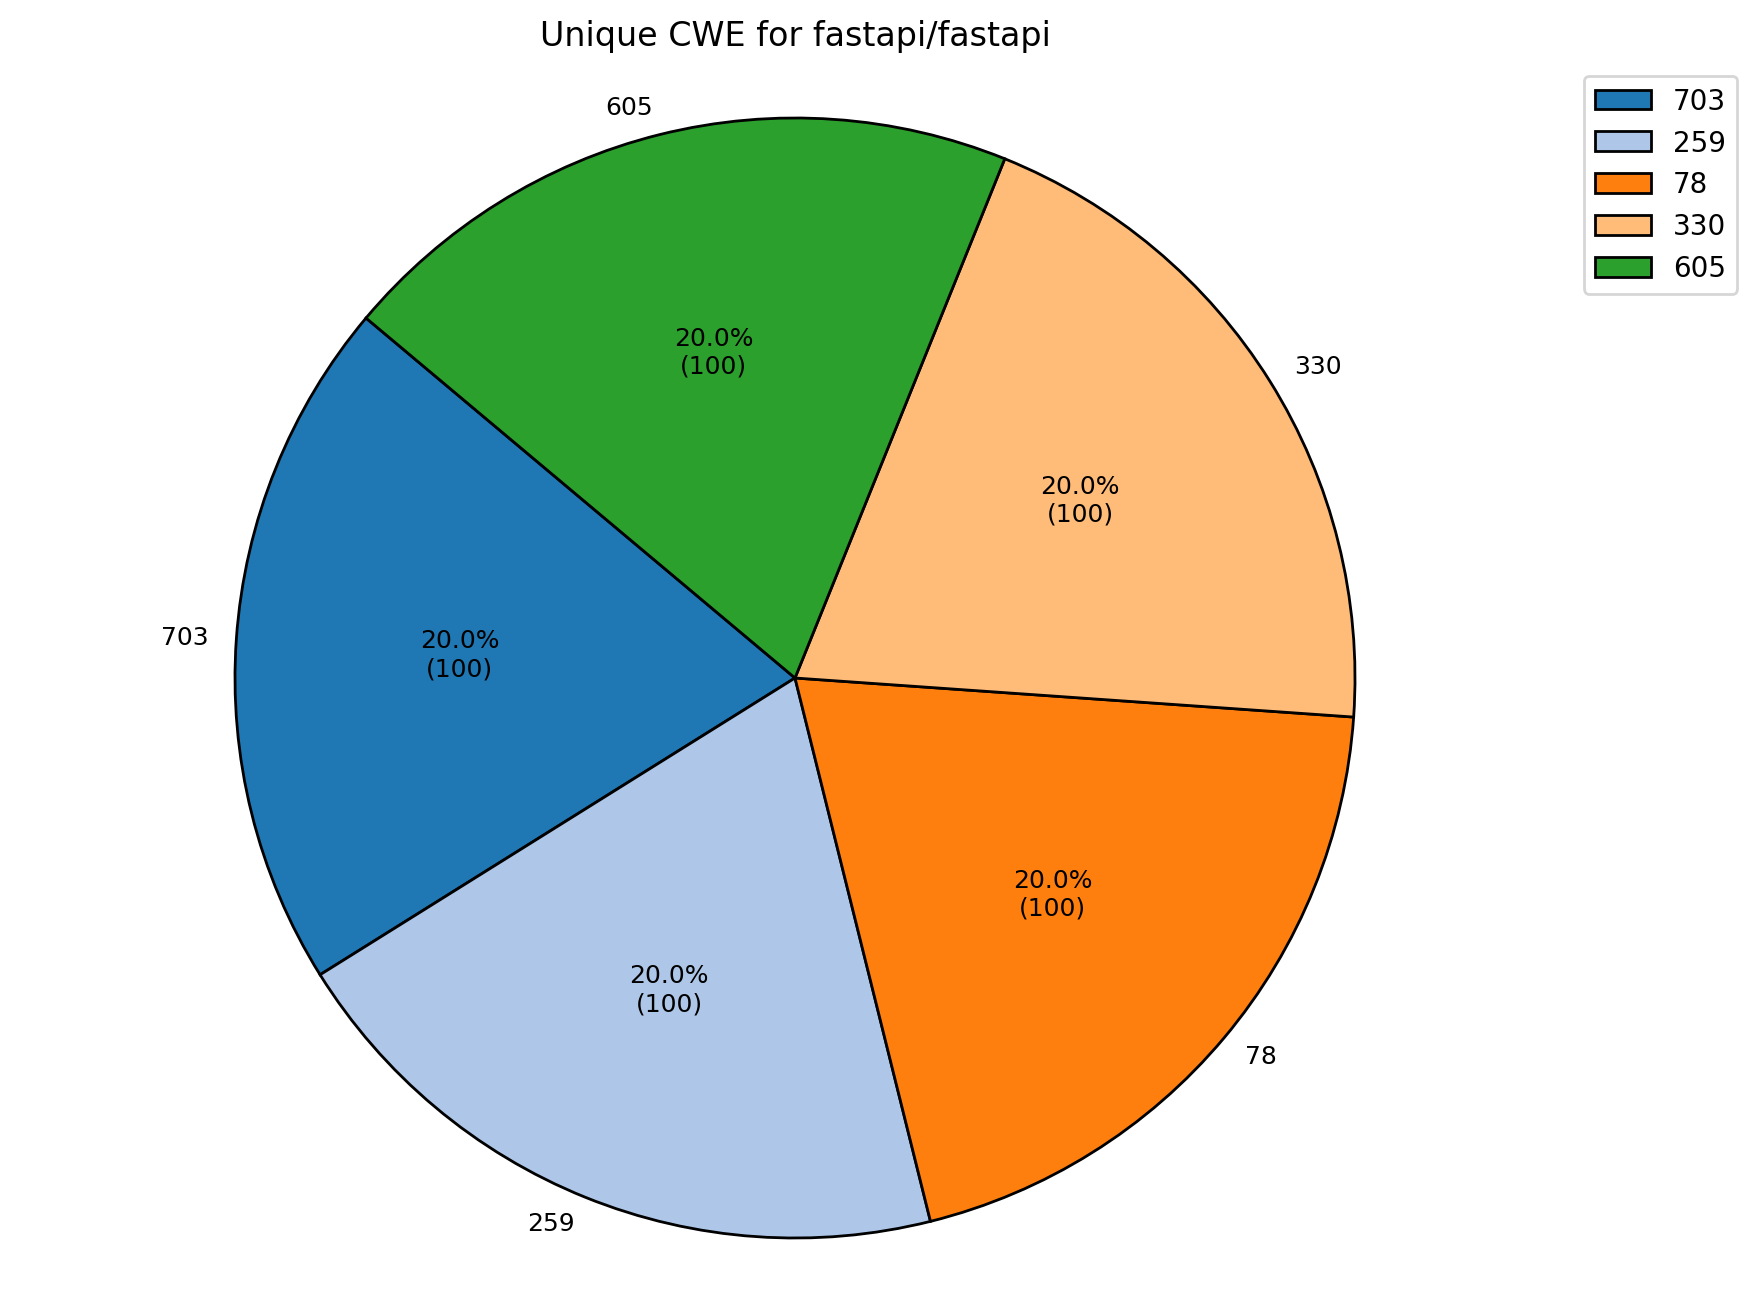

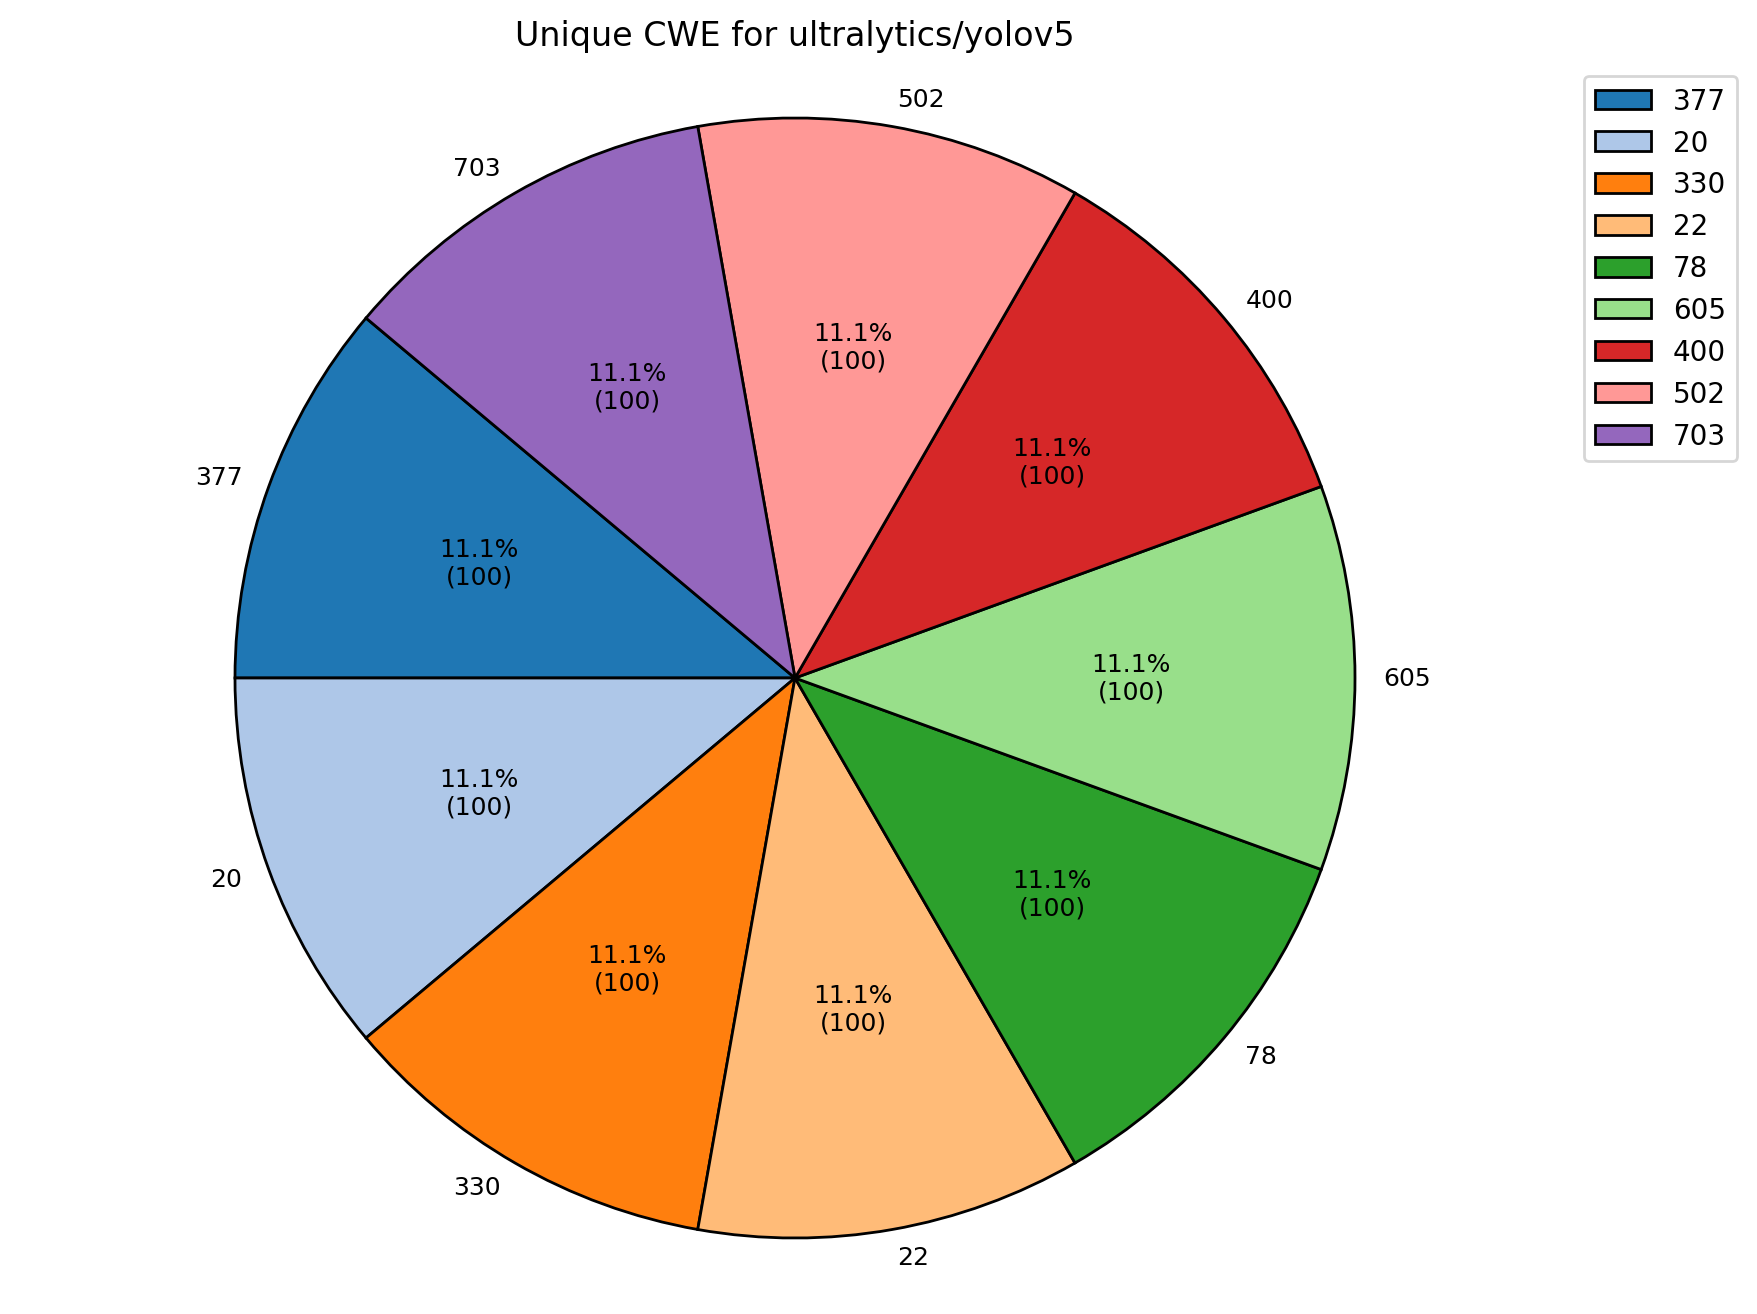

In [11]:
for cwe_count, title in zip(cwe_counts_individual, titles):
    plt.subplots(figsize=(10, 8))
    cwe_count = dict(sorted(cwe_count.items(), key=lambda x: x[1], reverse=True))
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({val:d})'
        return my_format

    plt.pie(cwe_count.values(), labels=cwe_count.keys(), autopct=autopct_format(cwe_count.values()), startangle=140, colors=sns.color_palette('tab20', len(cwe_count)), wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 9}, labeldistance=1.05)
    plt.axis('equal')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f"Unique CWE for {title}")
    name = title.split("/")[1]
    plt.savefig(f"./media/{name}_cwe_pie.png", dpi=1200)
    plt.show()